In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" 
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='C:/Users/Dickson/Downloads/Data Science tutorials/',untar=True)

In [21]:
data_dir

WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos')

In [19]:
#next we convert this data directory into a pathlib that can allow us work on our dataset easily as a numpy array
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos')

In [26]:
list(data_dir.glob('*/*.jpg'))
image_count= len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [28]:
#the glob function is important for example when you want to get only specific flowers
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

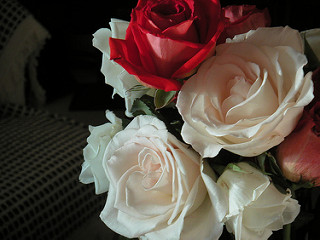

In [30]:
#we can now read the images using PIL library
PIL.Image.open(str(roses[1]))

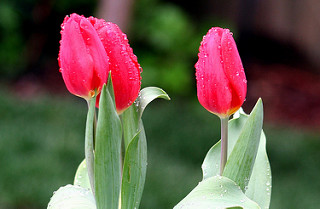

In [31]:
#we can even plot a specific flower 
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [33]:
#next we create the class names. We do this by first creating a dictionary of different flowes and the image path associated with it
#that will be usuful during model building process
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [35]:
flowers_images_dict['tulips']

[WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('C:/Users/Dickson/Downloads/Data Science tutorials/datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 Windo

In [51]:
#we can also create labels dictionary
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,  
}

In [38]:
#we can now use cv2 module to read these image files into open cv object/numpy array
str(flowers_images_dict['roses'][0])#gives path to where rose flowers are stored

'C:\\Users\\Dickson\\Downloads\\Data Science tutorials\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [41]:
img  = cv2.imread(str(flowers_images_dict['roses'][0]))#reads the images from disk and converts it to 3d np array
img
img.shape

(240, 179, 3)

In [42]:
#open cv has an image resize that resizes the images
#this helps because the images are not of same dimension and when we train our model we need all images to be of same dimention
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [45]:
#next we run a for loop and prepare for X and y
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
tulips
799


In [52]:
#so our X and y will be 
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [53]:
#we can quickly verify our above for loop
y[:5]

[0, 0, 0, 0, 0]

In [48]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [54]:
#for convinience we convert our X and y to a simple numply array
X = np.array(X)
y = np.array(y)

In [62]:
#next we split our data to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)#default sample split size is 0.25
len(X_train)

2228

In [61]:
len(X_test)

743

In [64]:
#next we scale our data
X_train_scaled = X_train/255
X_test_scaled = X_test/255


array([[[0.87058824, 0.90588235, 0.95686275],
        [0.87058824, 0.90588235, 0.96078431],
        [0.87843137, 0.91372549, 0.96470588],
        ...,
        [0.65490196, 0.74901961, 0.81960784],
        [0.6       , 0.70588235, 0.76862745],
        [0.55686275, 0.67058824, 0.72941176]],

       [[0.8745098 , 0.90980392, 0.96078431],
        [0.87058824, 0.90588235, 0.95686275],
        [0.86666667, 0.90196078, 0.95294118],
        ...,
        [0.63529412, 0.72941176, 0.8       ],
        [0.59215686, 0.69411765, 0.76078431],
        [0.56470588, 0.6745098 , 0.7372549 ]],

       [[0.87843137, 0.91372549, 0.96470588],
        [0.8745098 , 0.90980392, 0.96078431],
        [0.87058824, 0.90588235, 0.95686275],
        ...,
        [0.61568627, 0.70980392, 0.77647059],
        [0.58431373, 0.68235294, 0.75294118],
        [0.57647059, 0.67843137, 0.74509804]],

       ...,

       [[0.89411765, 0.91764706, 0.9372549 ],
        [0.89803922, 0.9254902 , 0.94509804],
        [0.89411765, 0

In [67]:
#now we can build our cnn model
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
        layers.Dense(128, activation ='relu'),
        layers.Dense(num_classes)#by default if activation not specified uses linear
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics =['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
70/70 [==============================] - 68s 910ms/step - loss: 1.2057 - accuracy: 0.4632
Epoch 2/30
70/70 [==============================] - 60s 848ms/step - loss: 0.9260 - accuracy: 0.6104
Epoch 3/30
70/70 [==============================] - 64s 910ms/step - loss: 0.7803 - accuracy: 0.6925
Epoch 4/30
70/70 [==============================] - 67s 957ms/step - loss: 0.6148 - accuracy: 0.7603
Epoch 5/30
70/70 [==============================] - 64s 909ms/step - loss: 0.4753 - accuracy: 0.8236
Epoch 6/30
70/70 [==============================] - 70s 993ms/step - loss: 0.3151 - accuracy: 0.8873
Epoch 7/30
70/70 [==============================] - 68s 966ms/step - loss: 0.1604 - accuracy: 0.9493
Epoch 8/30
70/70 [==============================] - 68s 970ms/step - loss: 0.0855 - accuracy: 0.9771
Epoch 9/30
70/70 [==============================] - 60s 855ms/step - loss: 0.0606 - accuracy: 0.9829
Epoch 10/30
70/70 [==============================] - 56s 795ms/step - loss: 0.0243 - accura

In [68]:
#we can evaluate this model
model.evaluate(X_test_scaled, y_test)

#this is an example of overfitting, the train model fit perfect but test model is very low

24/24 [==============================] - 10s 303ms/step - loss: 2.6082 - accuracy: 0.6581


[2.6082334518432617, 0.6581426858901978]

In [69]:
# we can also do some predictions
predictions = model.predict(X_test_scaled)
predictions



array([[ -0.1865115 ,   9.100015  ,   6.971111  , -22.029198  ,
          4.735221  ],
       [  6.26363   ,   6.5344067 ,  -0.7516492 , -29.065878  ,
          4.8889966 ],
       [  9.029984  ,  -2.621234  ,  -4.8596435 , -30.699106  ,
         22.71502   ],
       ...,
       [ -3.718022  ,   0.51657575,  14.557651  , -20.100643  ,
          5.948469  ],
       [  1.6893542 ,  19.456425  ,  -2.644034  , -40.12198   ,
         15.313419  ],
       [ 13.617527  ,   6.5211725 ,  -9.83138   , -37.148693  ,
         21.139397  ]], dtype=float32)

In [72]:
#we can convert this into a probability score as follows
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8.1875143e-05, 8.8356590e-01, 1.0511574e-01, 2.6729707e-14,
       1.1236553e-02], dtype=float32)>

In [73]:
#we can then use arg max to get the maxaximum element fromthe probability scores
np.argmax(score)


1

In [74]:
y_test[0]

2

In [81]:
#we can now use data augmentation to addres this overfitting issue
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.6),
])

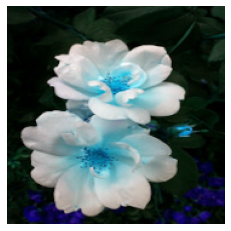

In [79]:
#lets first plot our first image
plt.axis('off')
plt.imshow(X[0])

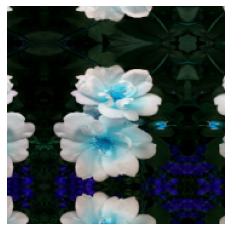

In [82]:
#to apply augmentation to above image
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
#you can notice the image is now zoomed

In [84]:
#we can also do random contrast
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9),
])

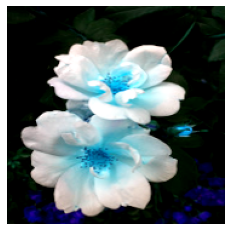

In [86]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))
#the image is very bright now

In [88]:
#we can even do rotation
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3),
])

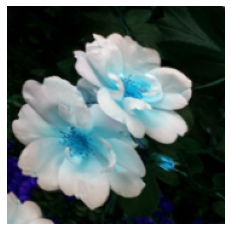

In [89]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

#we can use these functions to produce more samples to train our model

In [101]:
#Improve Test Accuracy Using Data Augmentation
def augment(img):
    
    data_augmentation = keras.Sequential(
      [
        layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                     input_shape=(img_height, 
                                                                  img_width,
                                                                  3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
      ]
    )
    return data_augmentation(img)

In [ ]:
#we again run our model now with augmentation data
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
        layers.Dense(128, activation ='relu'),
        layers.Dense(num_classes)#by default if activation not specified uses linear
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics =['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
70/70 [==============================] - 78s 1s/step - loss: 1.2512 - accuracy: 0.4439
Epoch 2/30
70/70 [==============================] - 80s 1s/step - loss: 1.0100 - accuracy: 0.5624
Epoch 3/30
70/70 [==============================] - 78s 1s/step - loss: 0.9327 - accuracy: 0.6100
Epoch 4/30
70/70 [==============================] - 78s 1s/step - loss: 0.8662 - accuracy: 0.6445
Epoch 5/30
70/70 [==============================] - 76s 1s/step - loss: 0.8268 - accuracy: 0.6607
Epoch 6/30
70/70 [==============================] - 73s 1s/step - loss: 0.7946 - accuracy: 0.6818
Epoch 7/30
70/70 [==============================] - 77s 1s/step - loss: 0.7806 - accuracy: 0.6768
Epoch 8/30
70/70 [==============================] - 73s 1s/step - loss: 0.7649 - accuracy: 0.6948
Epoch 9/30
70/70 [==============================] - 76s 1s/step - loss: 0.7181 - accuracy: 0.7024
Epoch 10/30
70/70 [==============================] - 74s 1s/step - loss: 0.7187 - accuracy: 0.7033
Epoch 11/30
70/70 [

In [ ]:
#We can again evaluate our model after data augmentation
model.ealuate(X_test_scaled,y_test)
#You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%